In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Matrix Plots (heatmap)

Nós apenas estudaremos o heatmap como Matrix Plot, mas uma outra opção interessante é o clustermap.

Para Matrix Plots, temos que passar dados matriciais. Com dados matriciais eu quero dizer que o nome do índice e coluna são coerentes e os valores correspondentes realmente querem dizer alguma coisa para ambos os nomes.

In [2]:
tips = sns.load_dataset('tips')

## Vamos ver duas formas de conseguir dados matriciais.  Primeiro, corr()

A mais fácil é utilizando o método **corr** para conseguir a correlação no coeficiente de Pearson.

In [3]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Note que são dados matriciais. Podemos formar um heatmap com isso.

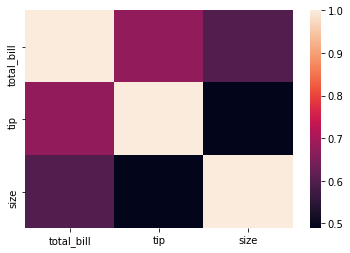

In [4]:
sns.heatmap(tips.corr())

Podemos customizar um pouco esse heatmap. Vamos começar com o parâmetro **annot**, que informa o valor de cada célula.

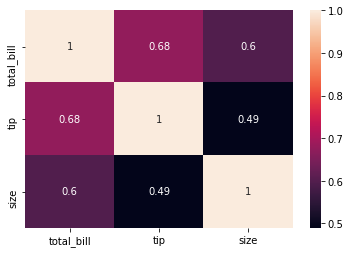

In [5]:
sns.heatmap(tips.corr(), annot=True)

Podemos também mudar o parâmetro **cmap**. Podemos fazer isso com quase todo plot Seaborn, porém às vezes esse parâmetro é chamado **palette**.

##### Utilizemos a referência do matplotlib: https://matplotlib.org/examples/color/colormaps_reference.html

**Vale a pena ler essa referência para entender a diferença entre cada tipo de colormap.**

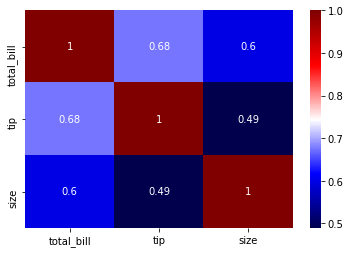

In [6]:
sns.heatmap(tips.corr(), annot=True, cmap='seismic')

## Segunda forma de conseguir dados matriciais: pivot_table()

Para esse exemplo, utilizarei uma outra base de dados/dataset.

In [7]:
flights = sns.load_dataset('flights')

In [8]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [9]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


Aqui nós temos 3 colunas. Uma de ano, outra de mês e outra dos passageiros. 

A pivot_table vai nos permitir reorganizar esses dados.

In [10]:
flights.pivot_table(index='year',columns='month',values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


Muita coisa aconteceu aqui. Mas é bem simples de entender. Basicamente, dissemos que queremos a coluna "year" no nosso índice, a coluna "month" como nossas novas colunas e os valores de cada célula os "passengers". 

Estamos, por baixo, fazendo um group by. Um group by precisa de uma função agregada, que por padrão é a média (pode verificar com o SHIFT+TAB: aggfunc = 'mean').

Somente para mostrar:

In [11]:
flights.pivot_table(index='year',columns='month',values='passengers',aggfunc='mean')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


Ok, agora vamos salvar essa pivot_table em algum lugar. E passar para o nosso heatmap.

In [12]:
fp = flights.pivot_table(index='year',columns='month',values='passengers',aggfunc='mean')

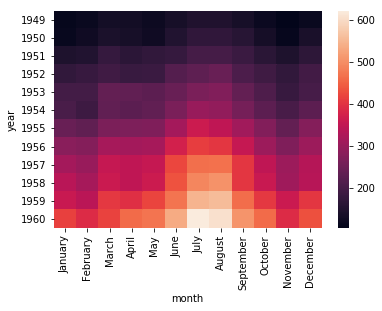

In [13]:
sns.heatmap(fp)

Podemos ver que o número de passageiros voando foi aumentando conforme o tempo (o que faz sentido. Afinal, quem é que voava em 1949?)

Também podemos ver que os meses de Julho e Agosto são os preferidos para viagens aéreas (podemos ver esse padrão desde 1956 até 1960).

Os dados são bem velhos, mas faz sentido ver isso. Afinal, a maioria das pessoas vai viajar durante suas férias de verão.

### Uma introdução à customização:

Podemos usar a função **figure** para definirmos DPI, aspect ratio etc.

E podemos misturar com o seaborn.

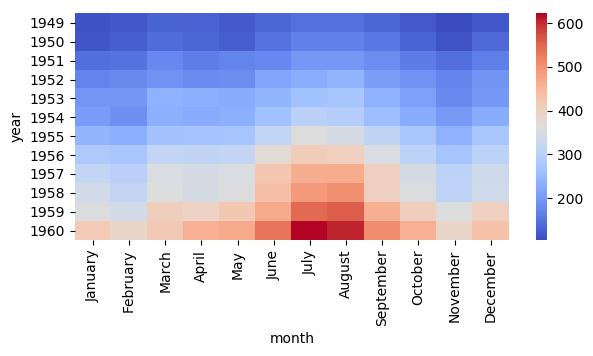

In [14]:
plt.figure(figsize=(7,3), dpi=100)

#figsize aceita uma tupla (dupla) com comprimento e altura, respectivamente.
#DPI é apenas os pontos por polegada.

sns.heatmap(fp, cmap='coolwarm')

O motivo dos meses terem ficado na vertical assim é que não há espaço para eles ficarem com seus nomes completos. Poderíamos mexer nos valores para abreviar os nomes.

Vou fazer o código para isso, mas vocês não precisam entender agora.

In [15]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [16]:
flights['month'].unique()

[January, February, March, April, May, ..., August, September, October, November, December]
Length: 12
Categories (12, object): [January, February, March, April, ..., September, October, November, December]

In [17]:
flights['month'] = flights['month'].apply(lambda x: x[:3])

In [18]:
flights['month'].unique()

[Jan, Feb, Mar, Apr, May, ..., Aug, Sep, Oct, Nov, Dec]
Length: 12
Categories (12, object): [Jan, Feb, Mar, Apr, ..., Sep, Oct, Nov, Dec]

In [19]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [20]:
fp = flights.pivot_table(index='year',columns='month',values='passengers')

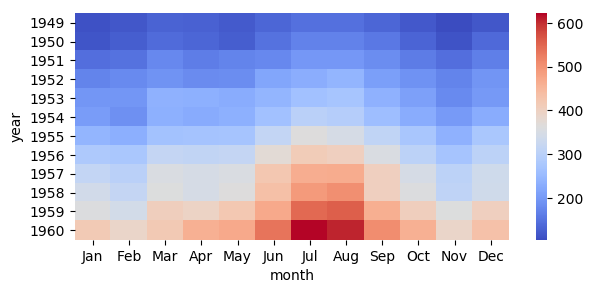

In [21]:
plt.figure(figsize=(7,3), dpi=100)

sns.heatmap(fp, cmap='coolwarm')

Existem outros parâmetros interessantes que podemos passar no nosso heatmap para customizá-lo e deixá-lo mais fácil de interpretar. **linewidths** e **linecolor** são meus favoritos.

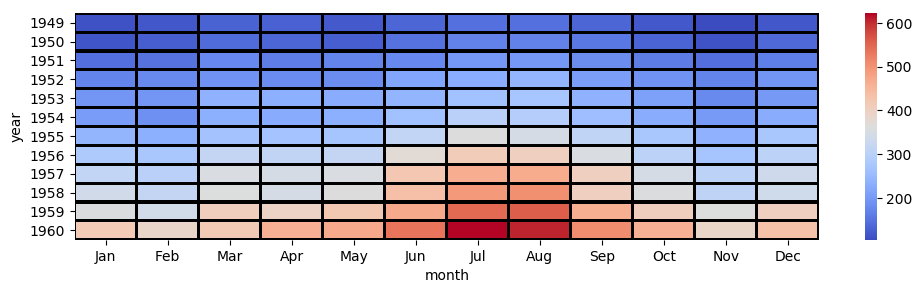

In [22]:
plt.figure(figsize=(12,3), dpi=100)

sns.heatmap(fp, cmap='coolwarm', linewidths=1.5, linecolor='black')

Pronto, agora, já que tocamos no assunto, vamos falar de customização para depois falarmos de Grids.

# Customização - parte 1 (Seaborn) (set_style, despine, set_context)

Voltando para o dataset tips

In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


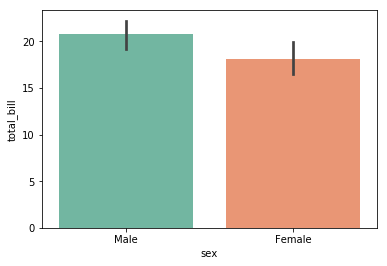

In [24]:
#barplot
sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')
#Notem que agora foi "palette", como eu tinha dito anteriormente. E usei a mesma referência
#https://matplotlib.org/examples/color/colormaps_reference.html

## despine

E se quisermos tirar alguma das bordas do nosso gráfico? Basta usarmos o método **despine**

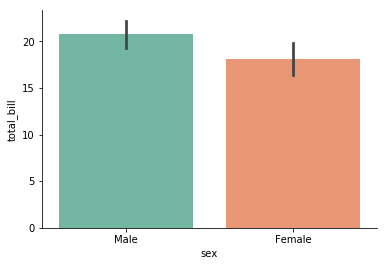

In [25]:
sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')
sns.despine()

Se vocês observarem os parâmetros que podemos passar para o despine, inclui 4 argumentos principais que nos interessam: 

**top, bottom, right, left**. Eles esperam um booleano, e por padrão top e right = True. Enquanto que os outros são False. 

Os que estiverem como True, são os que são apagados.

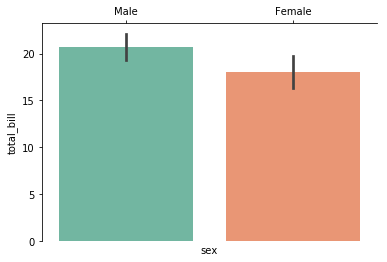

In [26]:
sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')
sns.despine(top=False,right=True,left=False,bottom=True) #não precisava especificar left=False nem right=True.
#Mas quis deixar claro

## set_style

O método set_style informa ao seaborn qual o estilo que seus plots seguirão daqui pra frente. Existem algumas opções, a minha preferida é a "whitegrid". Você pode experimentar com as outras opções explorando a documentação com o SHIFT+TAB

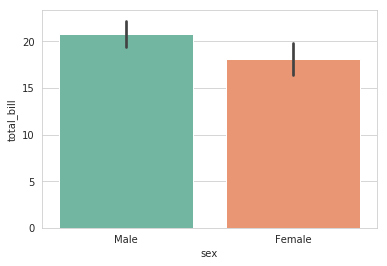

In [27]:
sns.set_style('whitegrid')
sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

Notaram a diferença? Mas agora lembrem-se que isso vale para todos os plots de aqui em diante

## set_context

Esse aqui não é muito óbvio o que faz só pelo nome. Mas o seaborn alguns contextos disponíveis para seus plots, você pode escolher um que valerá daqui em diante (de novo, usando o SHIFT+TAB)

Eu acho que jurei que não ia mais falar do shift+tab porque estava me cansando, mas a essa altura a última coisa que quero é que esqueçam que o Jupyter pode lhes ajudar

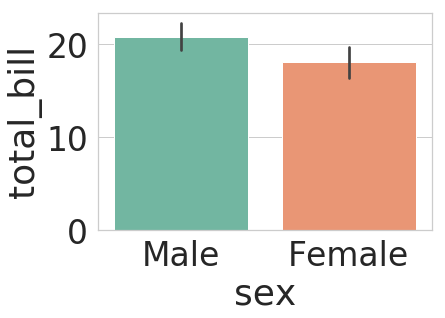

In [28]:
sns.set_context('notebook', font_scale=3) #coloquei font_scale = 3 para deixar clara a mudança

sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

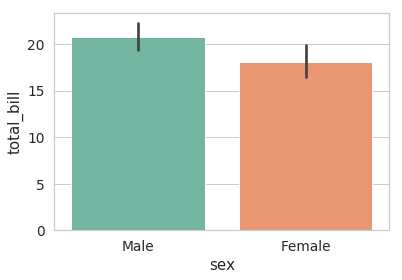

In [29]:
sns.set_context('notebook', font_scale=1.25)

sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

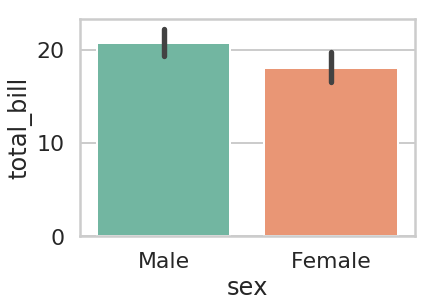

In [30]:
#Se estiver fazendo para um poster (tem como arrumar pra deixar melhor que isso ainda, veremos na próxima parte)
sns.set_context('poster')
sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

#### Lembrando que o contexto valerá daqui em diante

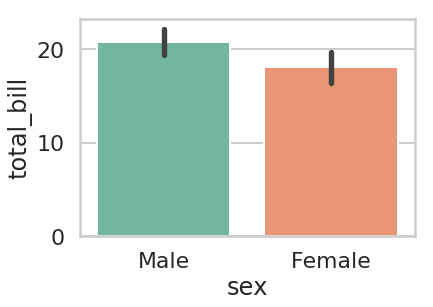

In [31]:
sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

#Outra célula do Notebook, mas o set_style e o set_context que definimos ainda valem.

Por isso, vou colocar um context agradável

In [32]:
sns.set_context('notebook', font_scale=1.25)
#já vimos antes como fica

# Customização - parte 2 (Seaborn + Matplotlib) 

#### Essa é a hora que estávamos esperando. Vamos tentar construir um plot bem legal aqui. 

#### Note bem a semelhança dos métodos que chamaremos com o que fizemos no Matplotlib

#### Lembrando: https://matplotlib.org/examples/color/colormaps_reference.html

Vamos usar o que já sabemos para construir um violinplot mais interessante!

Primeiro, usaremos o mesmo código do notebook anterior

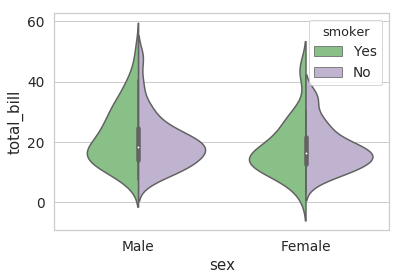

In [33]:
sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')
#apenas adicionei a palette
#Notem que o nosso style e context ainda estão valendo

Já vimos anteriormente neste notebook a função figure do matplotlib, vamos usá-la novamente mudando o nosso context. Manteremos o style como whitegrid.

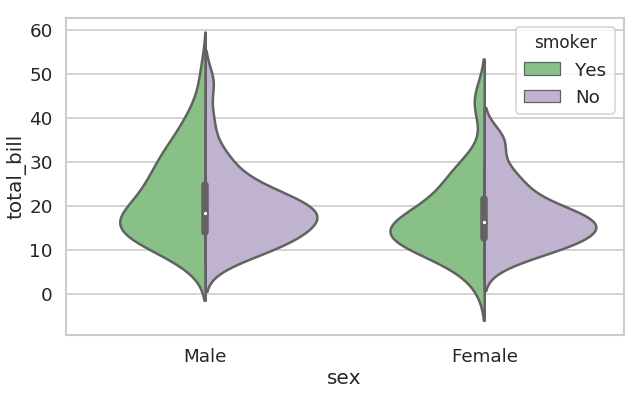

In [34]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

## Mudando titulo, nome de eixos...

Text(0, 0.5, 'Não poderia ficar de lado o y')

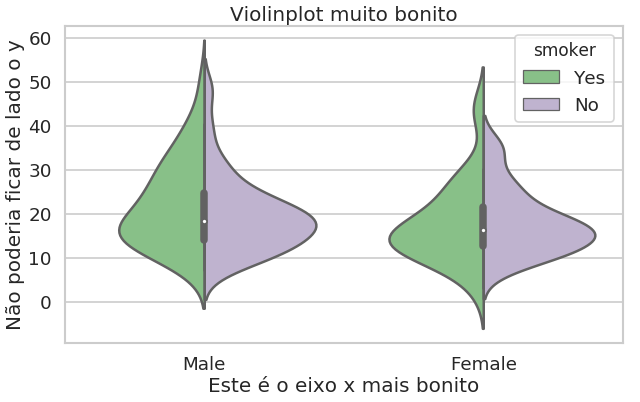

In [35]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

plt.title('Violinplot muito bonito')
#método title para mudar o título

plt.xlabel('Este é o eixo x mais bonito')
#método xlabel para mudar o rótulo do eixo x

plt.ylabel('Não poderia ficar de lado o y')
#método ylabel para mudar o rótulo do eixo y

Deixei um nome mais estranho para mostrar claramente a diferença. Agora façamos um mais sério:

Text(0, 0.5, 'Total Bill')

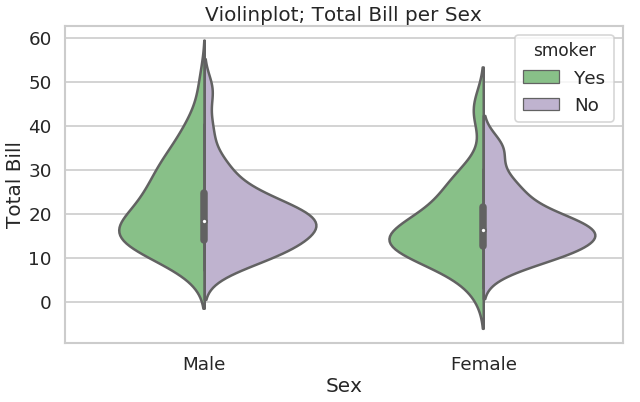

In [36]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

plt.title('Violinplot; Total Bill per Sex')
#método title para mudar o título

plt.xlabel('Sex')
#método xlabel para mudar o rótulo do eixo x

plt.ylabel('Total Bill')
#método ylabel para mudar o rótulo do eixo y

## tight_layout

Nós não vimos nenhum exemplo ainda desde que começamos no Seaborn (existe um exemplo no notebook 2, que fala do Matplotlib. Vale a pena checar), mas existem casos em que os textos podem ficar muito próximos uns dos outros, assim como figuras em si (figure objects, lembrem-se do quadro vazio/blank canvas). Nós veremos isso em mais detalhe na próxima parte. 

Por enquanto só quero que acreditem em mim que é sempre bom colocar tight_layout no fim de seus plots. Isso provavelmente não mudará nada no nosso caso aqui.

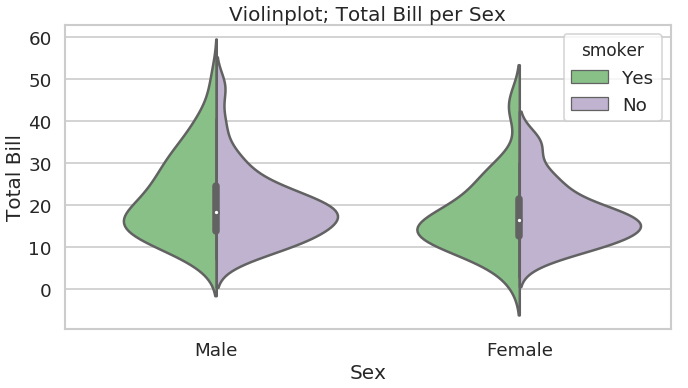

In [37]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

plt.title('Violinplot; Total Bill per Sex')
#método title para mudar o título

plt.xlabel('Sex')
#método xlabel para mudar o rótulo do eixo x

plt.ylabel('Total Bill')
#método ylabel para mudar o rótulo do eixo y

plt.tight_layout()
#método famoso tight_layout

## Limitando os eixos Y e X

Podemos limitar a visualização dos eixos Y ou X com duas funções simples do matplotlib. **xlim** e **ylim**.

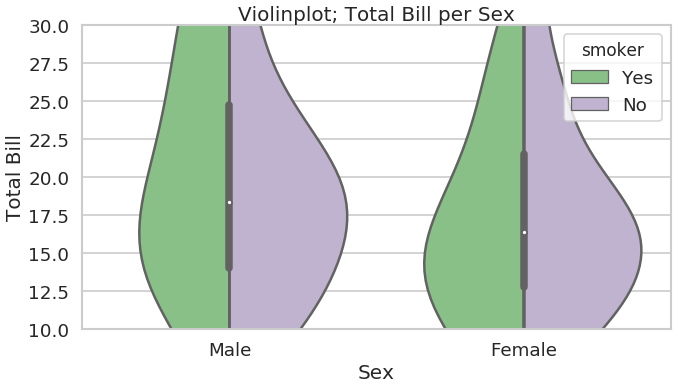

In [38]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

plt.title('Violinplot; Total Bill per Sex')
#método title para mudar o título

plt.xlabel('Sex')
#método xlabel para mudar o rótulo do eixo x

plt.ylabel('Total Bill')
#método ylabel para mudar o rótulo do eixo y

plt.ylim([10,30]) #vamos ver de y = 10 a y = 30
#plt.xlim não faz sentido aqui, mas é a mesma lógica.

plt.tight_layout()
#método famoso tight_layout

Nós passamos como argumento uma lista pro nosso método de limitação, mas na verdade **podemos simplesmente passar os valores "crus"**

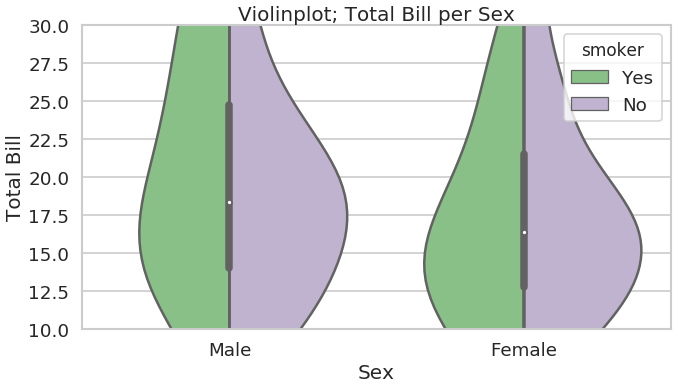

In [39]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

plt.title('Violinplot; Total Bill per Sex')
#método title para mudar o título

plt.xlabel('Sex')
#método xlabel para mudar o rótulo do eixo x

plt.ylabel('Total Bill')
#método ylabel para mudar o rótulo do eixo y

plt.ylim(10,30) #vamos ver de y = 10 a y = 30
#plt.xlim não faz sentido aqui, mas é a mesma lógica.

#NOTE QUE AGORA NÃO PASSAMOS COMO UMA LISTA.

plt.tight_layout()
#método famoso tight_layout

## Salvando figuras com o método savefig

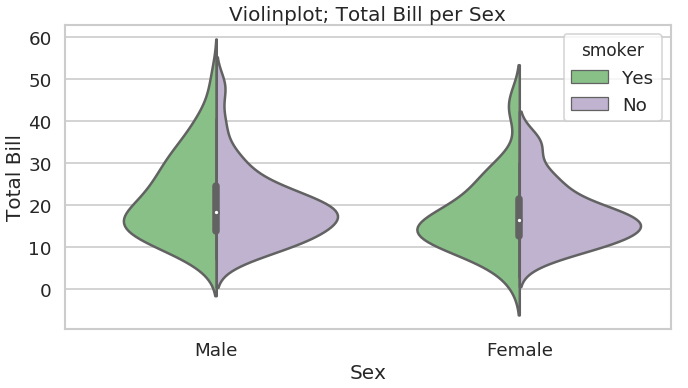

In [40]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

plt.title('Violinplot; Total Bill per Sex')
#método title para mudar o título

plt.xlabel('Sex')
#método xlabel para mudar o rótulo do eixo x

plt.ylabel('Total Bill')
#método ylabel para mudar o rótulo do eixo y

plt.tight_layout()
#método famoso tight_layout

plt.savefig('meu_plot_final.png',format='png') #apenas precisa passar o nome do arquivo final, se quiser passa o formato.
#Para o windows reconhecer e conseguir abrir, é bom colocar a extensão .png no nome do arquivo.

### Pode acontecer de não caber tudo na figura salva. Isso acontece mais com matplotlib puro, mas pode acontecer no seaborn se você não posicionar a legenda num lugar muito conveniente ou ter nomes muito grandes para os eixos, etc.

Uma solução para isso é usar bbox_inches='tight'

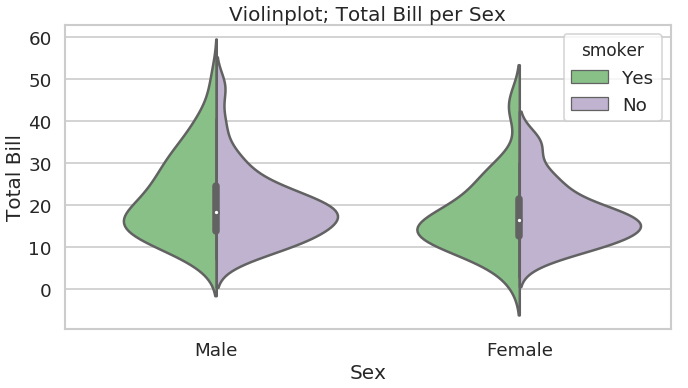

In [41]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

plt.title('Violinplot; Total Bill per Sex')
#método title para mudar o título

plt.xlabel('Sex')
#método xlabel para mudar o rótulo do eixo x

plt.ylabel('Total Bill')
#método ylabel para mudar o rótulo do eixo y

plt.tight_layout()
#método famoso tight_layout

plt.savefig('meu_plot_final.png',format='png',bbox_inches='tight')
#bbox_inches = 'tight'

Vale informar também que podemos informar o DPI apenas no savefig ao invés de informarmos na hora de criar o figure object com o plt.figure

Vejamos isso em ação:

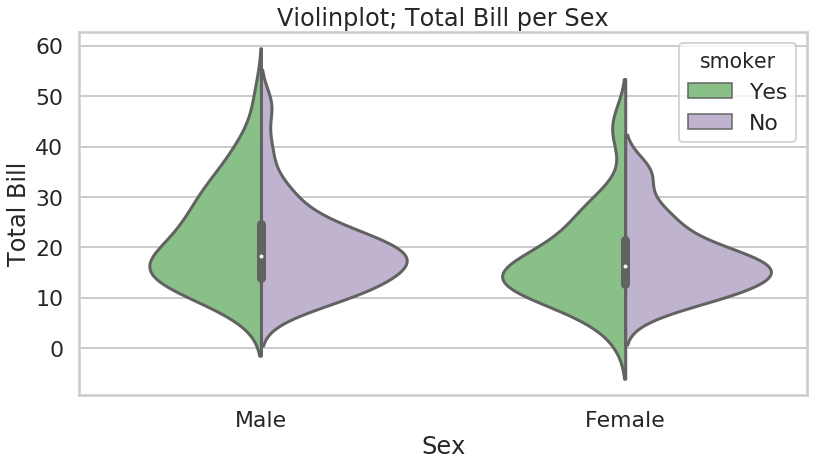

In [42]:
plt.figure(figsize=(12,7))

sns.set_context('poster')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

plt.title('Violinplot; Total Bill per Sex')
#método title para mudar o título

plt.xlabel('Sex')
#método xlabel para mudar o rótulo do eixo x

plt.ylabel('Total Bill')
#método ylabel para mudar o rótulo do eixo y

plt.tight_layout()
#método famoso tight_layout

plt.savefig('meu_plot_final.png',format='png',bbox_inches='tight',dpi=60)
#bbox_inches = 'tight'

Notem como mudou o DPI aqui na visualização do notebook. Mas a figura que foi salva se assemelha à que foi visualizada aqui na célula retrasada.

Isso é útil para renderizar algo com uma grande quantidade de DPIs especificando os DPIs apenas na hora de salvar a figura.

## Legendas

Ok, nós já somos verdadeiros mestres em customizar gráficos. Mas e se agora quisermos mudar a localização de nossas legendas? Vamos voltar um pouco para um plot mais antigo para explicarmos.

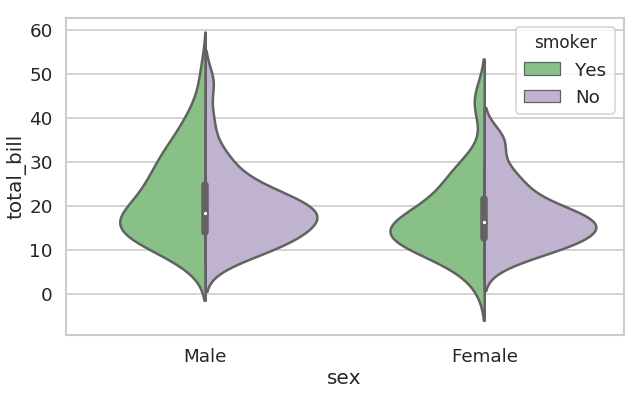

In [43]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster')

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

Pronto, lembrem-se do método de legenda do matplotlib, porque aqui vai ser exatamente a mesma coisa.

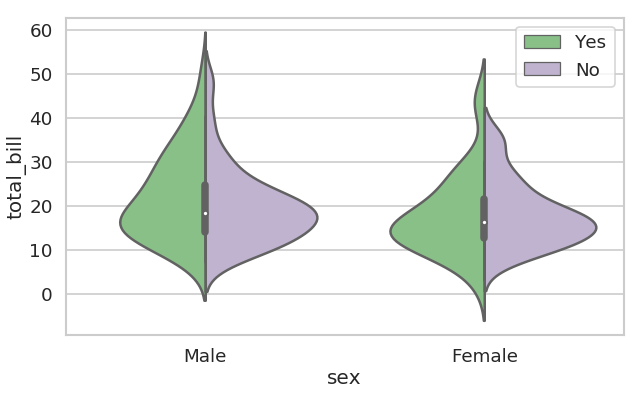

In [44]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster') #não precisava repetir. Mas só para deixar claro que estamos repetindo o mesmo código acima

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')

#daqui pra cima é o mesmo código

#método legend do matplotlib
plt.legend(loc=0)

#loc=0 deixa que o matplotlib escolha o melhor lugar para deixar as legendas.

#### Lembrem-se da documentação para legendas: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

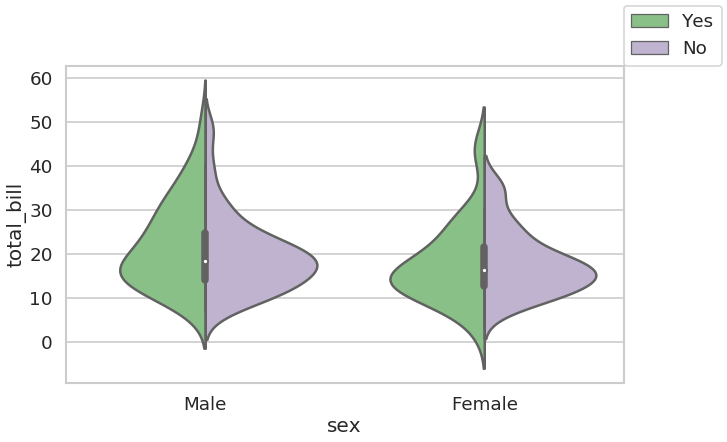

In [45]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster') #não precisava repetir. Mas só para deixar claro que estamos repetindo o mesmo código acima

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')


#lembrem-se que também podemos mandar uma tupla para o "loc" e que (1,1) é colocar a legenda colada no ponto
#extremo superior direito
plt.legend( loc=(1,1) )

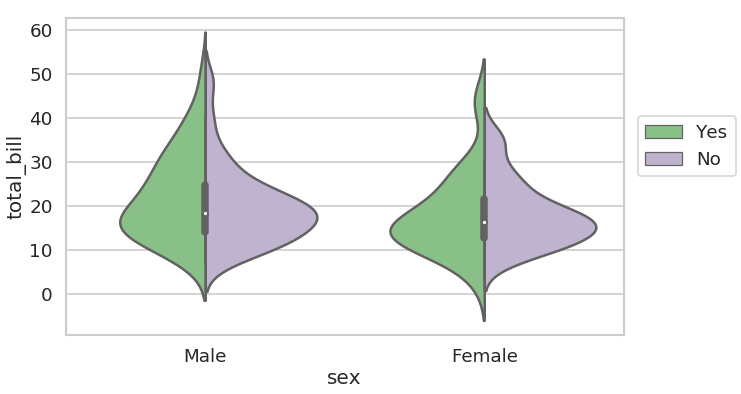

In [46]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster') #não precisava repetir. Mas só para deixar claro que estamos repetindo o mesmo código acima

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')


#essa noção vem com o tempo, mas basicamente você pode ir "chutando" valores x e y para o loc até ter o que você quer.
plt.legend( loc=(1.025,0.5) )

#### Se você ainda não notou, desde que começamos a fazer a legenda manualmente com o matplotlib, nós não temos mais o título da legenda. Vamos resolver isso!

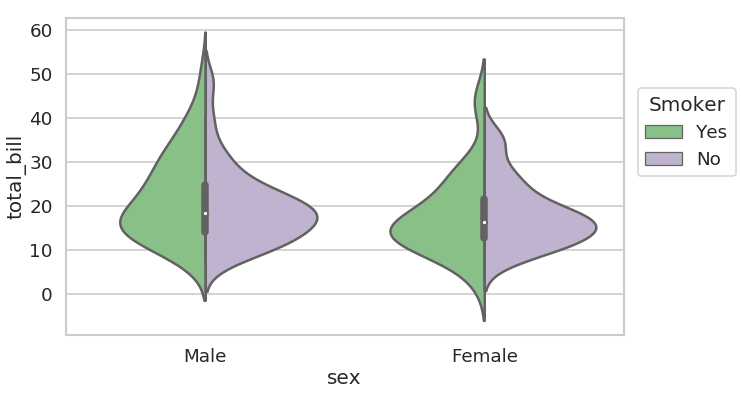

In [47]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster') #não precisava repetir. Mas só para deixar claro que estamos repetindo o mesmo código acima

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')



plt.legend( loc=(1.025,0.5), title = 'Smoker')

#### Vou agora mostrar como mudar o tamanho da fonte da legenda e do título da legenda, por mais que no nosso caso o tamanho já esteja bom (na minha opinião)

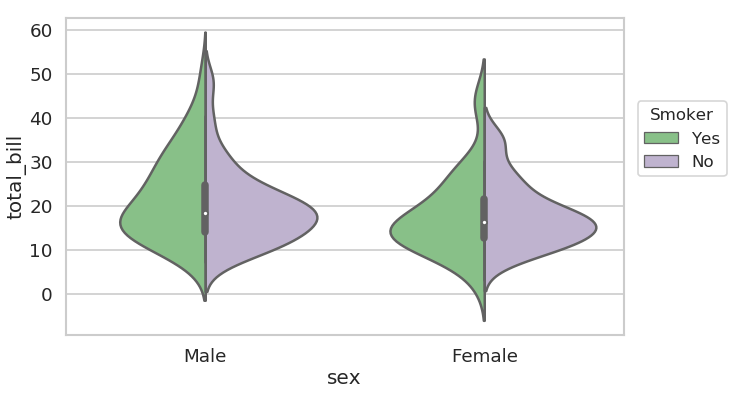

In [48]:
plt.figure(figsize=(12,7), dpi=60)

sns.set_context('poster') #não precisava repetir. Mas só para deixar claro que estamos repetindo o mesmo código acima

sns.violinplot(x='sex',y='total_bill',hue='smoker',split=True,data=tips, palette='Accent')



plt.legend( loc=(1.025,0.5), title = 'Smoker', fontsize=20, title_fontsize=20)

### Pronto. Agora vocês já tem tudo necessário para fazer suas visualizações (veremos Grids, que são mais "avançadas" ainda). Se você entendeu tudo até aqui, deveria ficar orgulhoso de si mesmo, porque não vai ficar mais difícil do que isso.

# Bônus - Intervalo eixos Y e X

Me foi perguntando em sala como aumentar o intervalo entre os valores no eixo Y (o método que mostrarei também vale pro eixo X). 

Na hora eu não sabia o método. 

Antes de jogar a vocês tudo na cara, vamos desacelerar.

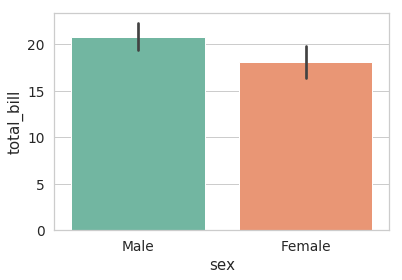

In [49]:
sns.set_context('notebook', font_scale=1.25)

sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

Ok, para mudarmos os valores que aparecem no eixo Y, podemos usar o método **yticks** do matplotlib. Nele, passaremos uma lista dos valores que queremos que apareçam.

([<matplotlib.axis.YTick at 0x7f9266b0b898>,
 <a list of 8 Text yticklabel objects>)

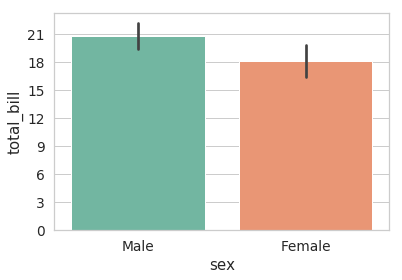

In [50]:
sns.set_context('notebook', font_scale=1.25)

sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

plt.yticks([0,3,6,9,12,15,18,21]) #escrevendo manualmente

Tivemos que escrever manualmente os números. Imagine se tivéssemos que fazer isso para intervalos minúsculos ou para vários valores?

Vamos explorar a função **range** própria do Python primeiramente. **range** em Python 3 é um **Generator** (estudem Python para entender).

In [51]:
range(0,10) #de 0 até 9. 
#Não vemos nada porque temos que converter isso numa lista (é um generator)

range(0, 10)

In [52]:
list( range(0,10) )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [53]:
#Podemos especificar o número de passos a percorrer com um terceiro argumento.

list( range(0,10,2) )

[0, 2, 4, 6, 8]

##### O maior problema com a função range é que ela não funciona para números que não sejam inteiros.

Por isso, vamos usar uma alternativa do NumPy. A função **arange**, que é quase a mesma coisa, mas é criado um NumPy Array.

In [54]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [55]:
np.arange(0,10,0.5) #de 0.5 em 0.5

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

Outro método do NumPy que pode ser útil para vocês é o método **linspace**, que cria *n* números igualmente espaçados em um determinado intervalo

In [56]:
np.linspace(0,10,30) #30 pontos de 0 a 10, igualmente espaçados

array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

### Mantendo isso em mente, vamos usar os métodos e funções que vimos

Primeiro vamos usar o **range** padrão de Python.

([<matplotlib.axis.YTick at 0x7f9266925a90>,
 <a list of 12 Text yticklabel objects>)

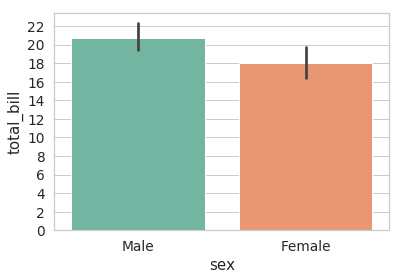

In [57]:
sns.set_context('notebook', font_scale=1.25)

sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

plt.yticks(range(0,23,2))

#Podemos usar sem converter para uma lista porque um generator é iterable(vale muito a pena estudar Python)
#Mas daria no mesmo convertendo para uma lista.
#plt.yticks(list(range(0,23,2)))

Porém, já sabemos que a limitação de **range** é que não é possível trabalhar com números de ponto flutuante. Por conta disso, vamos agora usar o método **arange** do NumPy.

([<matplotlib.axis.YTick at 0x7f9266878e80>,
 <a list of 9 Text yticklabel objects>)

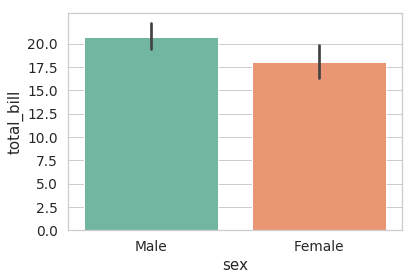

In [58]:
sns.set_context('notebook', font_scale=1.25)

sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

plt.yticks(np.arange(0,22,2.5))

No nosso caso o método **linspace** não será útil. No nosso caso, queremos exatamente o caso acima.

#### Porém, notem que eu passei 0, 22 e 2.5 como constantes, não como variáveis. Vamos experimentar com isso passando o número máximo como uma expressão (que na verdade é uma constante, mas que pelo menos não vamos precisar tentar adivinhar os valores máximos que aparecem


### Vamos estudar um pouco os valores para o sexo masculino e feminino.

In [59]:
tips[ tips['sex'] =='Male' ].head() #espero que lembrem de seleção condicional

#Usei o head apenas para não poluir demais a tela.
#Vamos pegar a ideia do tips[ tips['sex'] =='Male' ], que nos dá os clientes homens.

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [60]:
tips[ tips['sex'] =='Male' ].mean() #calcula a média em toda coluna numérica.

#Note que é uma Series. Podemos consultar um valor como se fosse um dicionário Python, como fizemos antes.

total_bill    20.744076
tip            3.089618
size           2.630573
dtype: float64

In [61]:
tips[ tips['sex'] =='Male' ].mean()['total_bill']

20.744076433121034

Isso que conseguimos foi a média da conta total dos homens. Podemos da mesma forma conseguir a das mulheres.

In [62]:
tips[ tips['sex'] =='Female' ].mean()['total_bill']

18.056896551724137

Lembrem-se que estamos brincando com um barplot usando a função agregada padrão, que é a média. **É por isso que usamos a média.**

E vimos agora com o Pandas o que já tinhamos visto com o nosso plot, que a média da conta dos homens é maior que das mulheres.

### Agora vamos pegar essa expressão e colocar no nosso "yticks"

([<matplotlib.axis.YTick at 0x7f9266861358>,
 <a list of 14 Text yticklabel objects>)

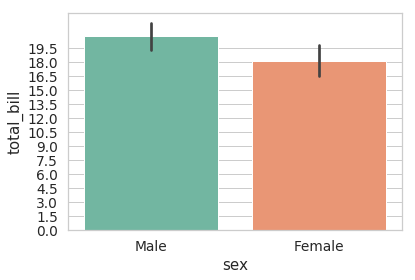

In [63]:
sns.set_context('notebook', font_scale=1.25)

sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

plt.yticks(np.arange(0,tips[ tips['sex'] =='Male' ].mean()['total_bill'], 1.5))

Ok, já ficou mais interessante. Porém, o limite não ficou muito bom. Vamos aumentar onde termina o nosso np.arange

([<matplotlib.axis.YTick at 0x7f9266845f28>,
 <a list of 15 Text yticklabel objects>)

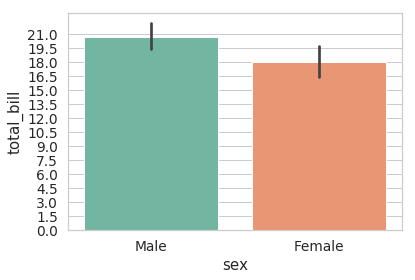

In [64]:
sns.set_context('notebook', font_scale=1.25)

sns.barplot(x='sex',y='total_bill',data=tips, palette='Set2')

plt.yticks(np.arange(0,
                     tips[ tips['sex'] =='Male' ].mean()['total_bill'] + 1,
                     1.5))
#somei 1 no limite superior do np.arange
#formatei assim para talvez ficar mais fácil de ver.